C:\Users\abhishek\AppData\Local\Temp\ipykernel_4904\1243637524.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Employee Data:
   employee_id            name  age  gender department               job_role   
0            1        John Doe   35    Male         IT      Software Engineer  \
1            2      Jane Smith   29  Female         HR          HR Specialist   
2            3   Alice Johnson   45  Female    Finance        Finance Manager   
3            4  Kevin Mitchell   34    Male         IT  Network Administrator   
4            5  Natalie Wilson   41  Female         HR             HR Manager   

    salary  tenure  performance_score  exit_status         exit_reason  
0  75000.0     5.5                4.3            0                None  
1  60000.0     3.2                3.8            1  Better opportunity  
2  90000.0    10.0                4.9            0                None  
3  67000.0     6.1                3.9            0                None  
4  78000.0     9.5                4.6            0                None  


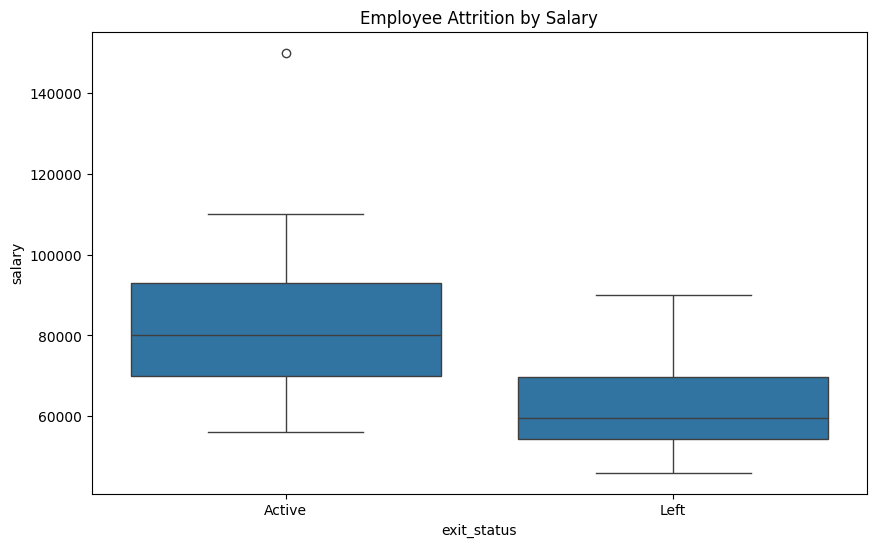

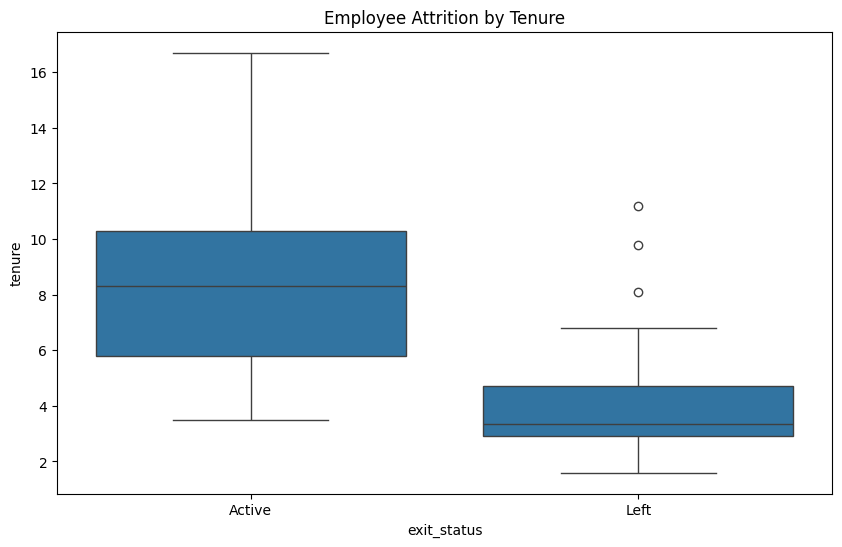

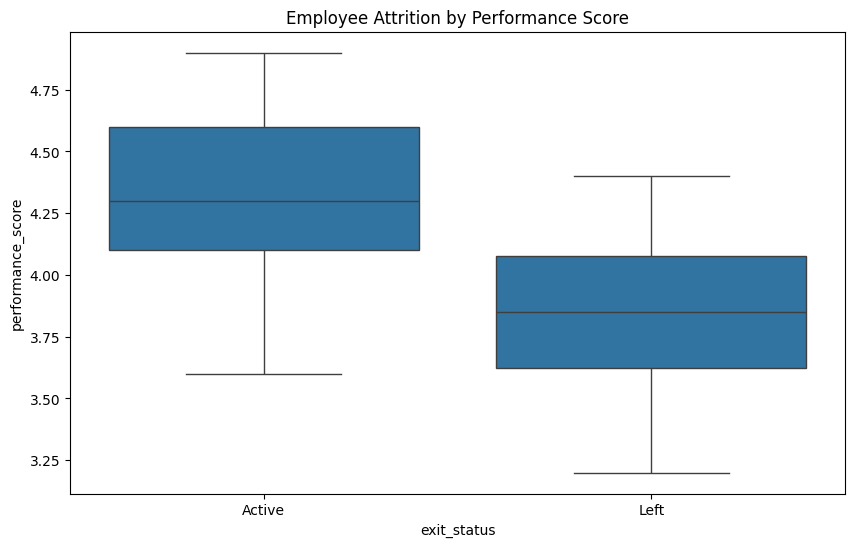

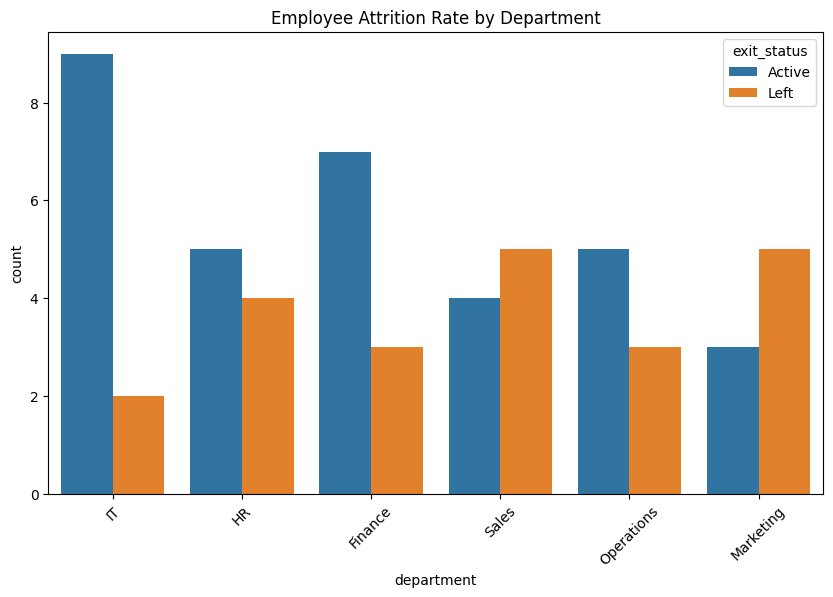

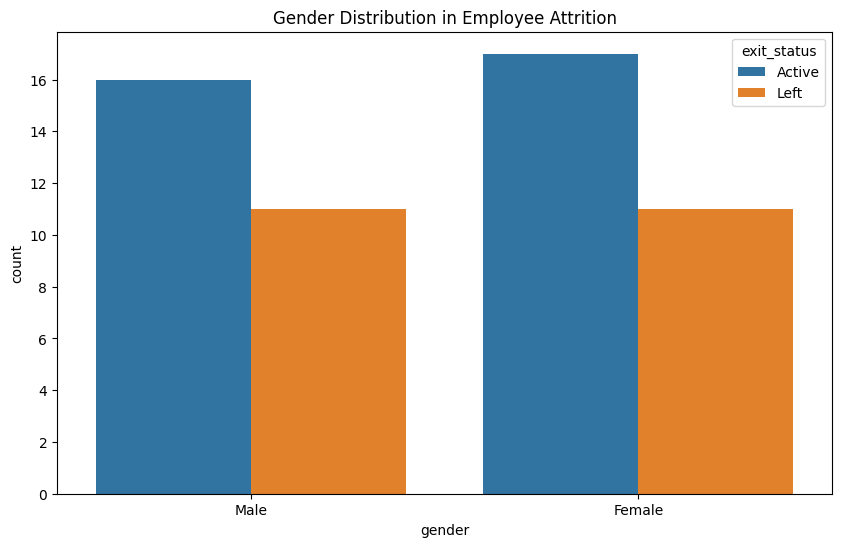

In [1]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Establishing connection to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="abhi1234",  
    database="project2"        
)

# Load employee data from MySQL into Pandas DataFrame
query = "SELECT * FROM employees"
df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display first few rows of the data
print("Employee Data:")
print(df.head())

# Data Preprocessing (handling any nulls, data types, etc.)
df['exit_status'] = df['exit_status'].map({0: 'Active', 1: 'Left'})  # Mapping exit status for better visualization
df['gender'] = df['gender'].map({'Male': 'Male', 'Female': 'Female'})

# Data Analysis & Visualization

# 1. Attrition by Salary
plt.figure(figsize=(10, 6))
sns.boxplot(x='exit_status', y='salary', data=df)
plt.title("Employee Attrition by Salary")
plt.show()

# 2. Tenure vs. Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='exit_status', y='tenure', data=df)
plt.title("Employee Attrition by Tenure")
plt.show()

# 3. Performance Score vs. Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='exit_status', y='performance_score', data=df)
plt.title("Employee Attrition by Performance Score")
plt.show()

# 4. Attrition Rate by Department
plt.figure(figsize=(10, 6))
sns.countplot(x='department', hue='exit_status', data=df)
plt.title("Employee Attrition Rate by Department")
plt.xticks(rotation=45)
plt.show()

# 5. Gender Distribution in Attrition
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='exit_status', data=df)
plt.title("Gender Distribution in Employee Attrition")
plt.show()
